In [1]:
import sys
import os
sys.path.append(os.path.abspath("../"))  # or "../../" depending on location

In [ ]:
import torch
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
import numpy as np
from models.CNN import CNN
from torchvision import transforms
from models.ResNet18 import get_resnet18_for_cifar10
from utils.evaluate_fgsm_functions import *


/var/folders/k3/b1t1gjg12pg0ycfdgpm2k7g00000gn/T/ipykernel_72818/3665846863.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("../models/

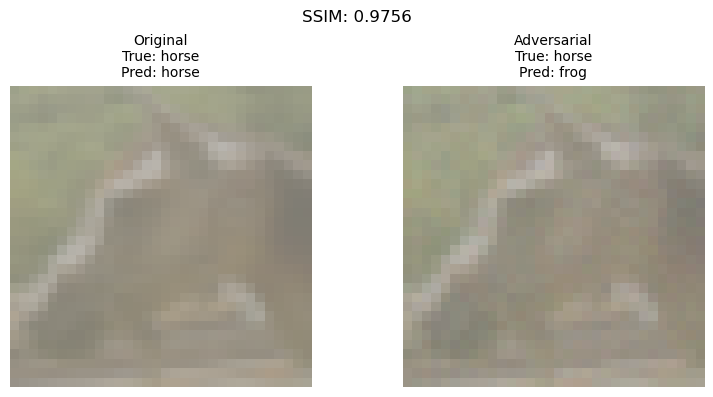

In [5]:
if torch.backends.mps.is_available():
    device = torch.device("mps")
elif torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
    
fgsm = "../attacks/fgsm/cifar10_fgsm_attack_byCNN.pt"
model = CNN()  # or ResNet18()
model.load_state_dict(torch.load("../models/pretrained/CNN_cifar10.pth"))
visualize_adversarial_pair(model, fgsm, index=5123, device=device)


In [6]:

# 全体の精度を確認
evaluate_accuracy_on_adv(model, fgsm, device=device)

/Users/yamashitanatsuki/Documents/Python/portfolio_adverasrial_example/utils/evaluate_fgsm_functions.py:71: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(a

Accuracy on Original:    81.34%
Accuracy on Adversarial: 47.92%


/var/folders/k3/b1t1gjg12pg0ycfdgpm2k7g00000gn/T/ipykernel_72818/632155489.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  resnet.load_state_dict(torch.load("../models/p

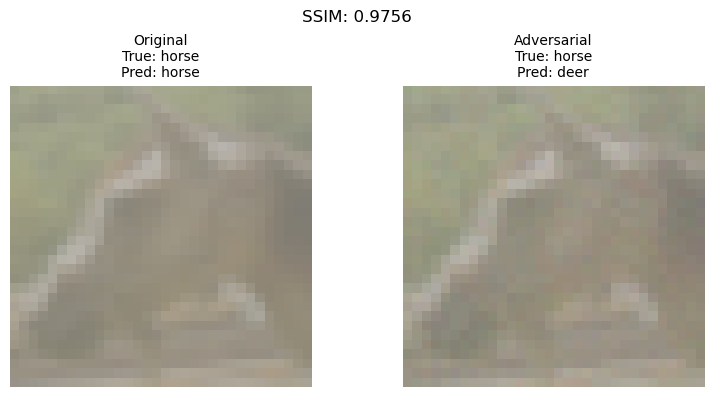

In [7]:
resnet = get_resnet18_for_cifar10()
resnet.load_state_dict(torch.load("../models/pretrained/ResNet18_cifar10.pth"))
visualize_adversarial_pair(resnet, fgsm, index=5123, device=device)

In [9]:
evaluate_accuracy_on_adv(resnet, fgsm, device=device)

/Users/yamashitanatsuki/Documents/Python/portfolio_adverasrial_example/utils/evaluate_fgsm_functions.py:71: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(a

Accuracy on Original:    88.93%
Accuracy on Adversarial: 73.95%
